# BCI-IL - Introduction to EEG Analysis Exercises 

Download the following files from the course page and place it in the same folder as this script:

 - The python file `bci_minitoolbox.py` containing some small utility functions.
 - The EEG dataset `eyes_closed_VPal.npz` which was recorded from a participant while relaxing with their eyes closed.

In [1]:
% matplotlib inline

import numpy as np
import scipy as sp
import scipy.signal
from matplotlib import pyplot as plt

import bci_minitoolbox as bci

In [2]:
fname= 'eyes_closed_VPal.npz'
X, fs, clab, mnt = bci.load_data(fname)

The EEG signals are in the matrix `X` with channels in the first and time in the second dimension.

In [3]:
X.shape

(118, 5958)

The labels of the corresponding channels are in the list `clab`. Indices of a specified channel can be obtained by the `index` function. The indices of several channels can be obtained simultaneously by employing an iterator.

In [4]:
ci = clab.index('Cz')
print(ci)

print('The first samples of channel %s are:' % clab[ci])
print(X[ci][:10])

selected_channels = ['Fpz', 'Fz', 'FCz', 'Cz', 'CPz', 'Pz', 'POz', 'Oz']
idx = [clab.index(x) for x in selected_channels]
print('\nThe indices of the selected channels are:')
print(idx)

53
The first samples of channel Cz are:
[ -6.3  -0.6 -13.1  -7.6  -3.7  -4.7 -15.4 -13.5 -17.7 -11.4]

The indices of the selected channels are:
[2, 17, 35, 53, 71, 90, 105, 112]


The sampling rate of the signals is given in variable `fs`.

Sampling rate fs= 100


Text(0.5, 1.0, 'The first 10 s of EEG channel Cz')

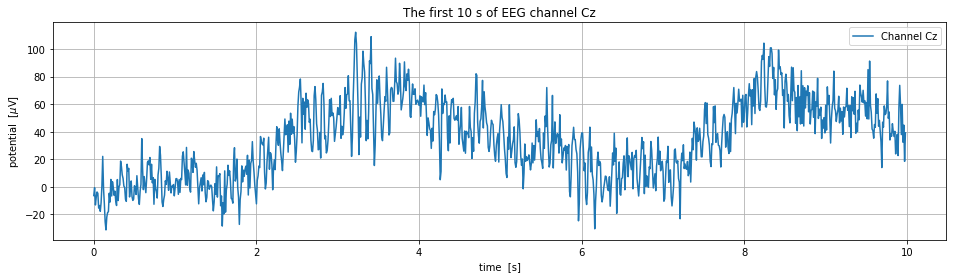

In [5]:
print('Sampling rate fs= %d' % fs)

# define time axis for plotting
time = np.arange(0, np.shape(X)[1]/fs, 1/fs)

nSec= 10
plt.figure(figsize=(16,4))
timeidx= np.arange(0, nSec*fs-1)
plt.plot(time[timeidx], X[ci, timeidx], label='Channel {}'.format(clab[ci]))
plt.xlabel('time  [s]')
plt.ylabel('potential  [$\mu$V]')
plt.legend()
plt.grid()
plt.title('The first %d s of EEG channel %s' % (nSec,clab[ci]))

## Exercises

Plot the signals of Channels C4 and C3 into one plot for the time interval 10 to 15 s.

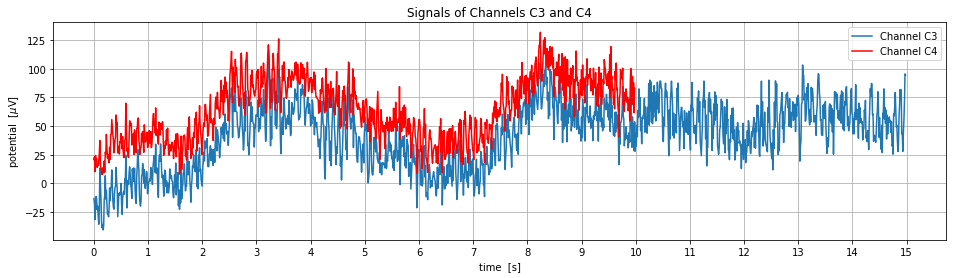

In [6]:
# Channel indices
c3, c4 = [clab.index(c) for c in ["C3", "C4"]]

# Time intervals
c3_sec= 15
c4_sec= 10
c3_timeidx= np.arange(0, c3_sec*fs-1)
c4_timeidx= np.arange(0, c4_sec*fs-1)

# Signals
c3_signal = X[c3, c3_timeidx]
c4_signal = X[c4, c4_timeidx]
# Plot
plt.figure(figsize=(16,4))
plt.plot(time[c3_timeidx], c3_signal, label = f'Channel {clab[c3]}')
plt.plot(time[c4_timeidx], c4_signal, label = f'Channel {clab[c4]}', color = 'r')
plt.xlabel('time  [s]')
plt.xticks(range(max(c3_sec, c4_sec) + 1))
plt.ylabel('potential  [$\mu$V]')
plt.legend()
plt.grid()
plt.title(f'Signals of Channels {clab[c3]} and {clab[c4]}')
plt.show()

Plot the same signals as before, but each shifted along the y-axis in the following way: Calculate the average (over time) of each signal during the first second of the displayed interval and subtract that value from the whole signal. 

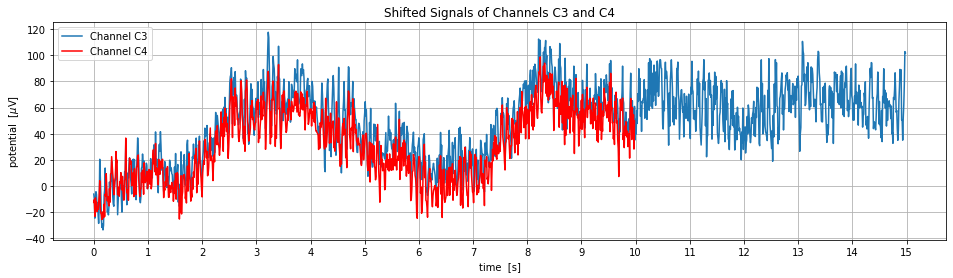

In [7]:
# Time average during first second of each signal
c3_1smean = np.mean(X[c3, :fs])
c4_1smean = np.mean(X[c4, :fs])

# New Signals
c3_new_signal = c3_signal - c3_1smean
c4_new_signal = c4_signal - c4_1smean

# Plot
plt.figure(figsize=(16,4))
plt.plot(time[c3_timeidx], c3_new_signal, label = f'Channel {clab[c3]}')
plt.plot(time[c4_timeidx], c4_new_signal, label = f'Channel {clab[c4]}', color = 'r')
plt.xlabel('time  [s]')
plt.xticks(range(max(c3_sec, c4_sec) + 1))
plt.ylabel('potential  [$\mu$V]')
plt.legend()
plt.grid()
plt.title(f'Shifted Signals of Channels {clab[c3]} and {clab[c4]}')
plt.show()

Look into the code of the functions in the bci_minitoolbox. Visualize the brain activity at time t = 5 s as scalp topography.

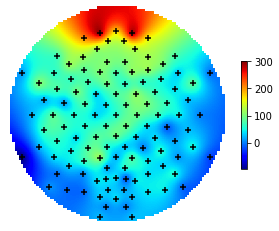

In [8]:
# Signal of all channels at t = 5s
t = 5
signals_t5 = X[:, t*fs + 1]

# Scalp topography map of brain activity collected from all channels at t = 5 s
bci.scalpmap(mnt, signals_t5)

Plot a sequence of scalp topographies for the time points 5.0, 5.1, 5.2, ..., 6.0 s. Use a common scaling for all colorbars.

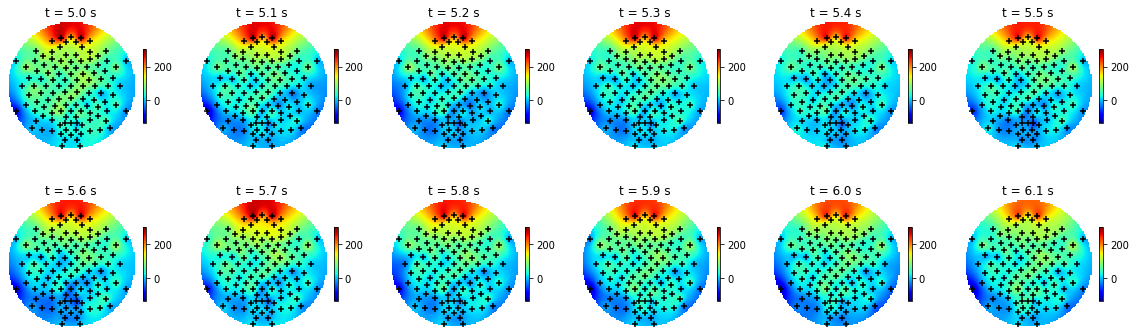

In [88]:
t_list = np.arange(5,6.2,.1)

# Minimum and maximum of all channels at all times. This serves to define the same scaling for all colorbars.
vmin = min([X[:, int(t*fs + 1)].min() for t in t_list])
vmax = max([X[:, int(t*fs + 1)].max() for t in t_list])

# Subplots
fig, axes = plt.subplots(2, 6, figsize = (20, 6))
for (i, ax) in enumerate(axes.flatten()):
    plt.sca(ax)
    t = t_list[i]
    signal_t = X[:, int(t*fs + 1)]
    bci.scalpmap(mnt, signal_t, clim = [vmin, vmax])
    plt.title('t = {:.1f} s'.format(t))
plt.show()

## Extra Exercise (just for fun)

In this exercise we want to see the time evolution of the brain activity in an animated scalp plot. To do so we take some of the definitions inside the function `scalpmap` from `bci_minitoolbox.py` and rewrite them here outside the function

In [107]:
from matplotlib import animation
from matplotlib.animation import FuncAnimation
%matplotlib notebook

<IPython.core.display.Javascript object>


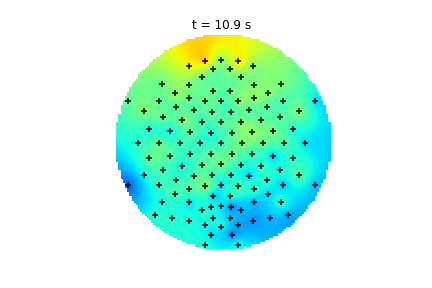

In [117]:
# Iime intervals and signals
sec = 20
interval = 0.1
t_list = np.arange(0, sec, interval)
signals_t = [X[:, int(t*fs + 1)] for t in t_list]

# Points where to interpolate the signal
xi, yi = np.linspace(-1, 1, 100), np.linspace(-1, 1, 100)
xi, yi = np.meshgrid(xi, yi)

# Mask area outside of the scalp  
a, b, n, r = 50, 50, 100, 50
mask_y, mask_x = np.ogrid[-a:n-a, -b:n-b]
mask = mask_x*mask_x + mask_y*mask_y >= r*r

# Limits for the colormaps
vmin = np.min(signals_t)
vmax = np.max(signals_t)

# Plot
fig, ax = plt.subplots()
# Function that draws each frame of the animation
def animate(i):
    
    ax.clear()
    rbf = sp.interpolate.Rbf(mnt[:,0], mnt[:,1], signals_t[i], function='linear')
    zi = rbf(xi, yi)
    zi[mask] = np.nan
    ax.imshow(zi, vmin=vmin, vmax=vmax, origin='lower', extent=[-1, 1, -1, 1], cmap='jet')
    ax.scatter(mnt[:,0], mnt[:,1], c='k', marker='+', vmin=vmin, vmax=vmax)
    ax.axis('off')
    ax.set_title('t = {:.1f} s'.format(t_list[i]))    
    
# Runs the animation
ani = FuncAnimation(fig, animate, frames=len(t_list), interval=500, repeat=False)

# Uncomment to save the animation
# f = r"./EEG_animation.gif" 
# writergif = animation.PillowWriter(fps = int(len(t_list)/sec)) 
# ani.save(f, writer=writergif)

ani